# Анализ продаж компьютерных игр для интернет-магазина 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные предоставлены по 2016 года. По легенде планируем кампанию на 2017-й. 

## Содержание:
* [Шаг 1. Общая информация](#1-bullet)
* [Шаг 2. Предобработка данных](#2-bullet)
* 2.1. [Замена названий столбцов](#2-1-bullet)
* 2.2. [Преобразование данных в нужные типы](#2-2-bullet)
* 2.3. [Обработка пропусков](#2-3-bullet)
* 2.4. [Поиск дубликатов](#2-4-bullet)
* 2.5. [Cуммарные продажи во всех регионах](#2-5-bullet)
* [Шаг 3. Исследовательский анализ данных](#3-bullet)
* 3.1. [Количество игр, выпущенные в разные годы](#3-1-bullet)
* 3.2. [Платформы](#3-2-bullet)
* 3.3. [Boxplot  по глобальным продажам игр и разбивкой по платформам](#3-3-bullet)
* 3.4. [Влияние отзывов пользователей и критиков на продажи](#3-4-bullet)
* 3.5. [Pаспределение игр по жанрам](#3-5-bullet)
* [Шаг 4. Портрет пользователя каждого региона](#4-bullet)
* 4.1. [Самые популярные жанры (топ-5) каждого региона](#4-1-bullet)
* 4.2.[Самые популярные платформы (топ-5) каждого региона](#4-2-bullet)
* 4.3.[Влияние рейтинга ESRB на продажи](#4-3-bullet)
* [Шаг 5. Проверка гипотез](#5-bullet)
* 5.1. [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#5-1-bullet)
* 5.2. [Средние пользовательские рейтинги жанров Action  и Sports  разные](#5-2-bullet)
* [Шаг 6. Общий вывод](#6-bullet)

## Шаг 1. Общая информация<a class="anchor" id="1-bullet"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


   
* в таблице 11 колонок и 16715 строк.
* в колонке ['Name'] пропущено 2 значения
* в колонке ['Year_of_Release'] пропущено 269 значений. Необходимо перевести значения из строки в дату.
* в колонке ['Genre'] пропущено 2 значения
* в колонке ['Critic_Score'] пропущено 8578 значений
* в колонке ['User_Score'] пропущено 6701 значение. Необходимо перевести значения из строкового типа в числа.
* в колонке ['Rating'] пропущено 6766 значение.
* необходимо заменить названия колонок (привести к нижнему регистру)


## Шаг 2. Предобработка данных<a class="anchor" id="2-bullet"></a>

### 2.1. Замена названий столбцов (приведение к нижнему регистру)<a class="anchor" id="2-1-bullet"></a>

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2. Преобразование данных в нужные типы<a class="anchor" id="2-2-bullet"></a>

In [5]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
2.3       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

    В оценках пользователей давольно часто (2424 раз) встречается аббревиатура tbd -
    "To Be Determined". Что означает "будет определено позже", оценки пользователя на
    данный момент нет. Заменим аббревиатура tbd на NaN (отсутствующее число в ячейке, 
    тип данных float) и переведем значения из строкового типа в числа.

In [6]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

   
     В колонке ['Year_of_Release'] необходимо перевести значения из строки в дату.

In [8]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year'] = df['year_of_release'].dt.year

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
year               16446 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.5+ MB



* в колонке ['Year_of_Release'] переведены значения из строки в дату. 
* в колонке ['User_Score'] переведены значения из строкового типа в числа. Увеличились пропуски на 2424 шт., так как аббревиатура tbd была заменена на NaN.


### 2.3. Обработка пропусков<a class="anchor" id="2-3-bullet"></a>

   
    В колонке ['Name'] и ['Genre'] пропущено 2 значения.
    Для этих пропущенных значений сложно предположить логичную замену.
    Посмотрим на строки

In [10]:
df.query('name.isnull() & genre.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,1993.0
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,1993.0


    Пропуски по двум колонкам совпадают. В этих двух строчках нам известна только платформа,
    год и сумма продаж. Так как эти игры были выпущены еще в 1993 году, данные вероятно не
    актуальны для планирования рекламных компаний 2017 года. Удалим эти строки, так как они 
    не несут полезной информации для анализа.


In [11]:
df.dropna(subset = ['name'], inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
year               16444 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.7+ MB




    * в колонке ['year_of_release'] пропущено 269 значений, это 1,6% от общего объема данных.
    Заполнение средним значением или медианой будет не корректно, предположить логическую 
    замену не возможно.

    * в колонке ['critic_score'] и ['user_score'] большой объем пропущенных значений. Это 
    значит, что рейтинга от критиков или пользователей нет. Заполнение средним значением 
    или медианой будет не корректно, предположить логическую замену не возможно. Но так как 
    пропущенных значений много, есть риск, что значения NaN могут привести к некорректным 
    результатам при группировке данных и рассчетах. Данные пропуски будут заполнены значением
    "-1", чтобы не спутать с реальными данными.

    * в колонке ['rating'] пропущено 6764 значения. Пропущенные значения означают, что
    международная ассоциация не определила рейтинг компьютерных игр и не присвоила им подходящую
    возрастную категорию. Либо, что эти данные не были занесены. В любом случае, логически
    данные пропуски не заполнить. Можно заменить пропущенные данные на "no rating".

In [13]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna('no rating')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
year               16444 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.7+ MB


    Пропуски остались в одной колонке ['year'] - 1.6%

### 2.4. Поиск дубликатов<a class="anchor" id="2-4-bullet"></a>

In [15]:
df.duplicated().sum()

0

In [16]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [18]:
df['rating'].unique()

array(['E', 'no rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

    В датасете не обнаружены полные дубликаты, а также скрытые дубликаты в категориальных
    значениях.

    Далее в колонке ['rating'] будут объедены категории «E» и «K-A», так как они обозначают
    одно и тоже "игры для всех". 

### 2.5. Cуммарные продажи во всех регионах<a class="anchor" id="2-5-bullet"></a>

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006.0,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no rating,1985.0,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no rating,1996.0,31.38


Text(0.5, 1.0, 'Cуммарные продажи игр по годам')

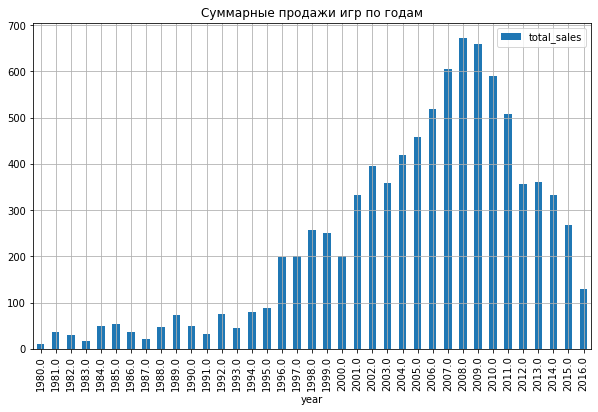

In [20]:
df.pivot_table(index='year', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(10, 6))
plt.title('Cуммарные продажи игр по годам')

   
    Посмотрим на распределение сумм продаж по годам. Мы видим низкие продажи до 100 млн $
    в период с 1980г по 1995 год. Далее начинается рост. Пик продаж с 2007 по 2008 год.
    Даллее начинается спад. Это может быть связано с тем, что мобильные игры вытесняют 
    консольные и компьютерные. 51% всей прибыли в игровой индустрии приходиться как раз-таки
    на игры для мобильных устройств. Согласно аналитическим данным Newzoo, отрыв мобильных 
    игр от консольных, браузерных и компьютерных будет только увеличиваться с каждым годом.

## Шаг 3. Исследовательский анализ данных<a class="anchor" id="3-bullet"></a>

### 3.1. Количество игр, выпущенные в разные годы <a class="anchor" id="3-1-bullet"></a> 

Text(0.5, 1.0, 'Количество игр, выпущенные в разные годы')

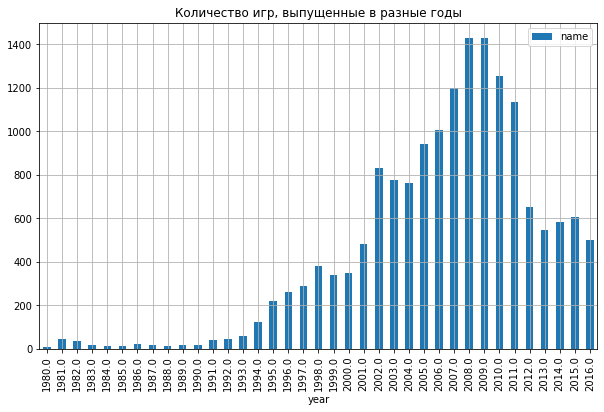

In [57]:
df.pivot_table(index='year', values='name', aggfunc='count').plot(kind='bar', grid=True, figsize=(10, 6))
plt.title('Количество игр, выпущенные в разные годы')

In [22]:
df.groupby('year')['name'].agg(['count']).sort_values('count',ascending=False).head(15)

,count
year,
2008.0,1427
2009.0,1426
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1006
2005.0,939
2002.0,829
2003.0,775


    Посмотрим на количество игр, выпущенные в разные года.
    Самое низкое количество игр было выпущено в период с 1980г по 1994 год.
    Далее начинается рост. Резкий скачок в 2002 году. Пик выпуска игр с 2008 по 2009 год.
    Даллее начинается спад. Как было сказано выше, спад связан с развитием мобильных игр.

### 3.2. Платформы<a class="anchor" id="3-2-bullet"></a>

Text(0.5, 1.0, 'Количество игр, выпущенные на разных платформах. ')

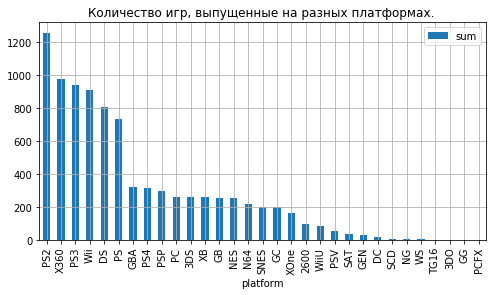

In [58]:
df.groupby('platform')['total_sales'].agg(['sum']).sort_values('sum',ascending=False).plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Количество игр, выпущенные на разных платформах. ')

In [24]:
df.groupby('platform')['total_sales'].agg(['sum']).sort_values('sum',ascending=False).head(6)

,sum
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


Проанализируем 6 самых продаваемых платформ: PS2, X360, PS3, Wii, DS, PS.

In [25]:
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

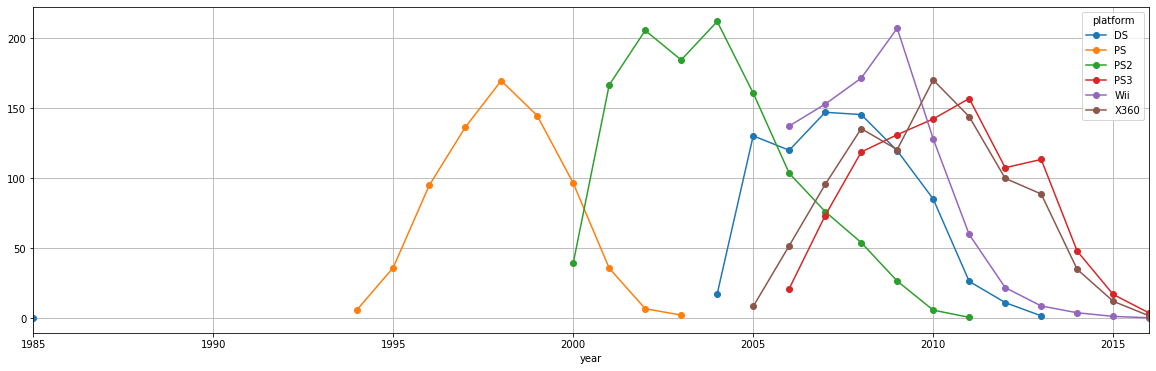

In [26]:
df.query('platform == @platform_list').pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum').plot(style='o-', grid=True, figsize=(20, 6))


In [27]:
df.query('platform == @platform_list').pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')

platform,DS,PS,PS2,PS3,Wii,X360
year,,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN,NaN
2001.0,NaN,35.59,166.43,NaN,NaN,NaN




Проанализируем 6 самых продаваемых платформ
* 1994 - 2003 год, платформа ***PS***, продолжительность продаж 10 лет.
* 2000 - 2011 год, платформа ***PS2***, продолжительность продаж 12 лет.
* 2004 - 2013 год, платформа ***DS***, продолжительность продаж 10 лет.
* 2005 - 2016 год, платформа ***X360***, продолжительность продаж 12 лет.
* 2006 - 2016 год, платформа ***PS3***, продолжительность продаж 11 лет.
* 2006 - 2016 год, платформа ***Wii***, продолжительность продаж 11 лет.

Платформы исчезают за 10-12 лет. 3 платформы, по которым еще есть продажи в 2016 год, приносят малленькую прибыль 3.60 - 0.18 млн $. Это значит, что в ближайшее время платформы пропадут. Необходимо найти платформы, вышедшие 5-6 лет назад, с макисмальной прибылью за последние годы.

Text(0.5, 1.0, 'Продажи по платформам, появившимся после 2010')

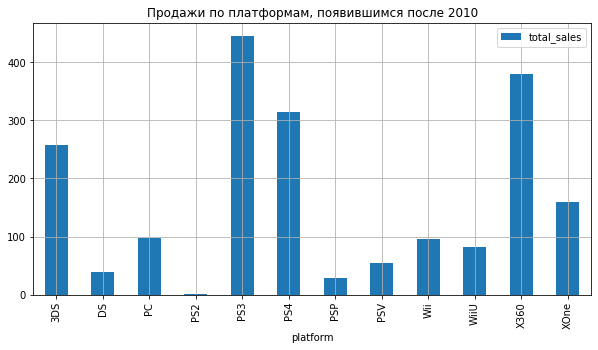

In [62]:
df.query('year > 2010').pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('Продажи по платформам, появившимся после 2010')

In [29]:
df.query('year > 2010').pivot_table(index='platform', columns='year', values='total_sales', aggfunc='sum')

year,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,
3DS,63.20,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,NaN,NaN,NaN
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,NaN,NaN,NaN,NaN,NaN
PS3,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,25.99,100.00,118.90,69.25
PSP,17.82,7.69,3.14,0.24,0.12,NaN
PSV,4.63,16.19,10.59,11.90,6.25,4.25
Wii,59.65,21.71,8.59,3.75,1.14,0.18


    C 2011 по 2016 год пятерка лидеров продаж выглядит так:
    PS3, X360, PS4, 3DS, XOne.

    Необходимо проанализировать продажи по годам, чтобы проследить тенденцию.
    У каких платформ идет рост продаж, у каких спад.

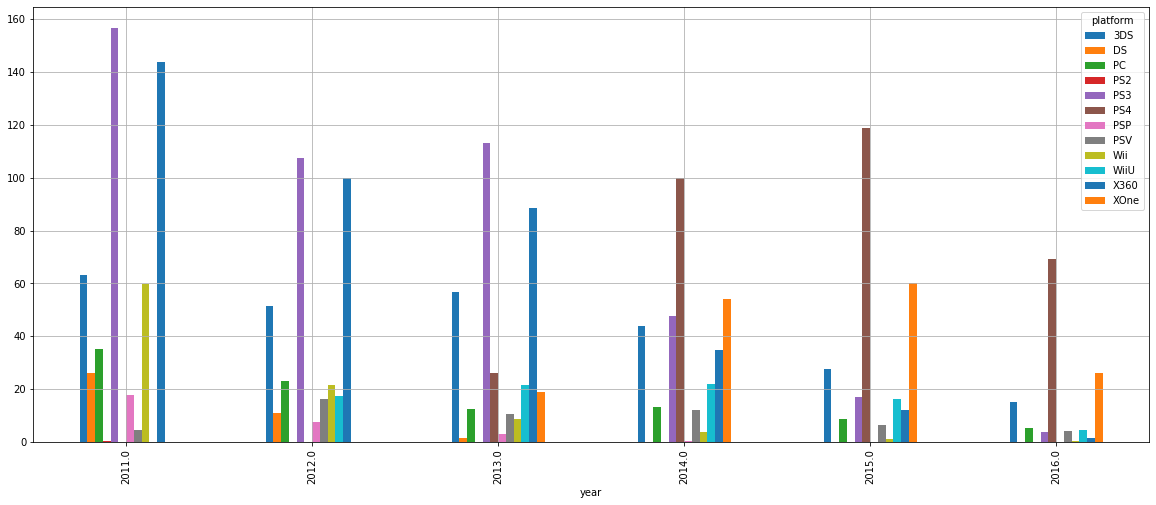

In [30]:
df.query('year > 2010').pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(20, 8))


In [31]:
platform_list_new = ['3DS', 'PS4', 'WiiU', 'XOne']

In [32]:
df.query('platform == @platform_list_new & year > 2010').pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,PS4,WiiU,XOne
year,,,,
2011.0,63.20,NaN,NaN,NaN
2012.0,51.36,NaN,17.56,NaN
2013.0,56.57,25.99,21.65,18.96
2014.0,43.76,100.00,22.03,54.07
2015.0,27.78,118.90,16.35,60.14
2016.0,15.14,69.25,4.60,26.15



    
Платформы, на которые нужно сделать акцент в следующем году:
* ***PS4*** - год выпуска 2011г., в продаже 7 лет, наибольшая прибыль за последние 3 года (2014-2016)
* ***XOne*** - год выпуска 2013., в продаже 5 лет, находится на втором месте по прибыли за последние 3 года (2014-2016)
* ***3DS*** - год выпуска 2011г., в продаже 7 лет, находится на третьем месте по прибыли за последние 3 года (2014-2016)

***WiiU*** хоть и относительно молодая платформа (6 лет в продажах), но прибыль по ней уменьшается с каждым годом. Остальные платформы в продажах 10 и более лет.

Возьмем актуальный период с 2011 по 2016 год. В этот год выпускаются 2 новых платформы, 3ья выпускается позже в 2013г. Три года данные платформы конкурировали и боролись с текущими лидерами, с 2014 года вышли на лидирующие позиции. Так как с 2010 года начинается спад по количеству выпускаемых игр и по общим продажам, в этом периоде остаются платформы, которые могут конкурировать на рынке.

### 3.3 Boxplot  по глобальным продажам игры и разбивкой по платформам<a class="anchor" id="3-3-bullet"></a>

    
    Построим график «ящик с усами» по глобальным продажам каждой игры, а затем  с разбивкой
    по платформам. Сравним результаты.

(-0.1, 1.1)

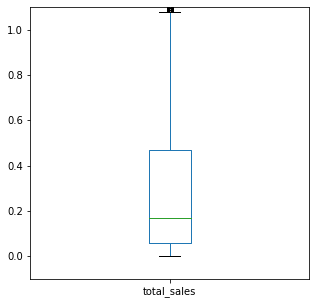

In [33]:
df['total_sales'].plot.box(figsize=(5,5))
plt.ylim(-0.1, 1.10)

In [34]:
df['total_sales'].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

    Продажи игр достигают до 1,1 млн долларов. Медиана - 0,17 млн $.

    
***Boxplot по наиболее популярным на конец 2016 года платформам***

(-0.25, 1.8)

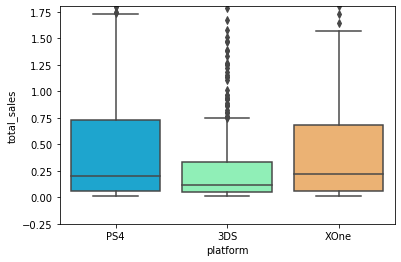

In [63]:
column_list1 = ['PS4', 'XOne', '3DS']
df_1 = df.query('platform == @column_list1')
import seaborn as sns
sns.boxplot(x="platform", y="total_sales", data=df_1, palette='rainbow')
plt.ylim(-0.25, 1.8)


In [36]:
df.query('platform == @column_list1').pivot_table(index='platform', values='total_sales', aggfunc=('median', 'mean'))

,mean,median
platform,,
3DS,0.498077,0.12
PS4,0.801378,0.20
XOne,0.645020,0.22


    
- ***PS4*** - продажи достигают до 1,75 млн долларов. Межквартальный размах больше, чем у платформ 3DS и XOne. Так же видим, что у платформы PS4 датасет сильнее скошен вправо. Через этот канал приходят те, кто тратит на игры, больше медианного значения. Поэтому среднее значение у данной платформы самое большое - 0,8 млн доллоров, медиана 0,2 млн доллоров.

- ***XOne*** - продажи достигают до 1,58 млн доллоров. Межквартальный размах меньше, чем у платформы PS4. Датасет скошен вправо, но меньше, чем у платформы PS4.  Среднее значение у данной платформы ниже, чем у  PS4 - 0,65 млн доллоров, а медиана больше - 0,22 млн доллоров.

- на третьем месте платформа ***3DS***. Продажи достигают до 0,75 млн доллоров. Среднее значение - 0,49 млн доллоров, медиана 0,12 млн доллоров.

Результаты по платформам ***PS4***  и ***XOne*** превышают показатели по глобальным продажам каждой игры . Результаты по  платформе ***3DS*** ниже, чем показатели по глобальным продажам каждой игры. 

### 3.4. Влияние отзывов пользователей и критиков на продажи<a class="anchor" id="3-4-bullet"></a>


**Влияние отзывов критиков на продажи внутри одной популярной платформы PS4**

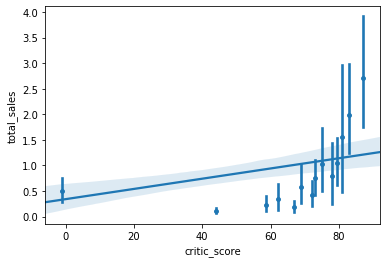

In [37]:
df_PS4 = df.query('platform == "PS4"')
sns.regplot(x='critic_score', y='total_sales',data=df_PS4, x_bins=20, scatter_kws={'s':15})

In [38]:
df_PS4['critic_score'].corr(df_PS4['total_sales'])

0.22652606614612347

    На графике мы видим зависимость: с ростом первой величины (отзыв критиков) 
    растет вторая величина (продажи). Т.е., чем выше отзывы критиков, тем больше продажи.

    Коэффициент Пирсона равен 0,23. Чем ближе коэффициент Пирсона к значению 1, тем
    сильнее взамосвязь.


**Влияние отзывов пользователей на продажи внутри одной популярной платформы PS4**

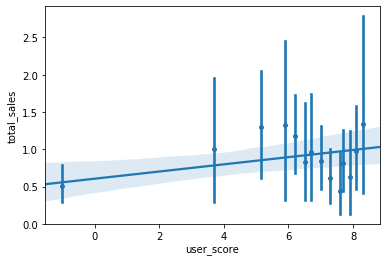

In [39]:
sns.regplot(x='user_score', y='total_sales',data=df_PS4, x_bins=20, scatter_kws={'s':15})

In [40]:
df_PS4['user_score'].corr(df_PS4['total_sales'])

0.1159614931286009


    На графике мы видим зависимость: с ростом первой величины (отзыв пользователей)
    растет вторая величина (продажи). Т.е., чем выше отзывы пользователей, тем больше продажи.

    Коэффициент Пирсона равен 0,12. Чем ближе коэффициент Пирсона к значению 1, 
    тем сильнее взамосвязь.

    Оценка пользователей оказывает меньше влияния на продажи, чем оценка критиков.

**Влияние отзывов критиков на продажи по всем платформам за актуальный период**

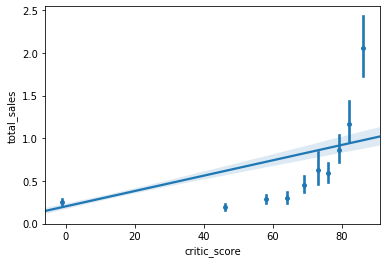

In [41]:
data_2011 = df.query('year > 2010')
sns.regplot(x='critic_score', y='total_sales',data=data_2011, x_bins=20, scatter_kws={'s':15})

In [42]:
data_2011['critic_score'].corr(data_2011['total_sales'])

0.2736884811636506


    Когда мы берем информацию по всем платформам, то взаимосвязь между отзывами критиков
    и продажами усиливается.

    Коэффициент Пирсона увеличился с 0,23 до  0,27.


**Влияние отзывов пользователей на продажи по всем платформам за актуальный период**

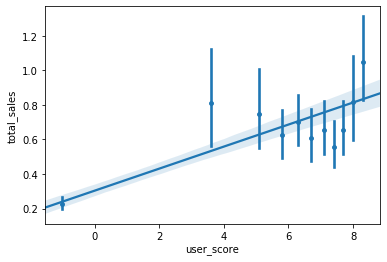

In [43]:
data_2011 = df.query('year > 2010')
sns.regplot(x='user_score', y='total_sales',data=data_2011, x_bins=20, scatter_kws={'s':15})

In [44]:
data_2011['user_score'].corr(data_2011['total_sales'])

0.20781653635258424


    Когда мы берем информацию по всем платформам, то взаимосвязь между отзывами пользователей
    и продажами усиливается.

    Коэффициент Пирсона увеличился с 0,12 до  0,21.

    Оценка пользователей оказывает меньше влияния на продажи, чем оценка критиков.
    Но в общем датасете разница между этими двумя показателями сокращается.

### 3.5. Pаспределение игр по жанрам<a class="anchor" id="3-5-bullet"></a>

Text(0.5, 1.0, 'Количество выпущенных игр по жанрам')

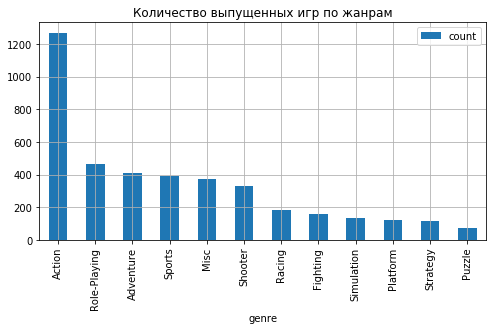

In [65]:
data_2011.groupby('genre')['name'].agg(['count']).sort_values('count',ascending=False).plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Количество выпущенных игр по жанрам')

    Больше всего выпускается игр жанра Action.
    Число игр с этим жанром сильно превышает остальные.

    На втором месте по количеству игр жанры:
    Role-Playing, Adventure, Sports, Misc и Shooter.

    На третьем месте по количеству игр жанры:
    Racing, Fighting, Simulation, Platform, Strategy, Puzzle 

Text(0.5, 1.0, 'Суммы продаж по жанрам')

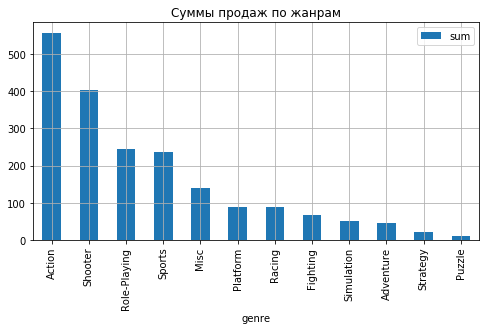

In [66]:
data_2011.groupby('genre')['total_sales'].agg(['sum']).sort_values('sum',ascending=False).plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Суммы продаж по жанрам')

   
    Жанры с высокими продажами:
    Action, Shooter, Role-Playing, Sports.

    Жанры с  низкими продажами:
    Misc, Platform, Racing, Fighting, Simulation, Adventure, Strategy, Puzzle 

    Таким образом, в жанре Action выпускается больше всего игр и они приносят больше
    всего дохода.

Посмотрим сколько в среднем стоит игра каждого жанра

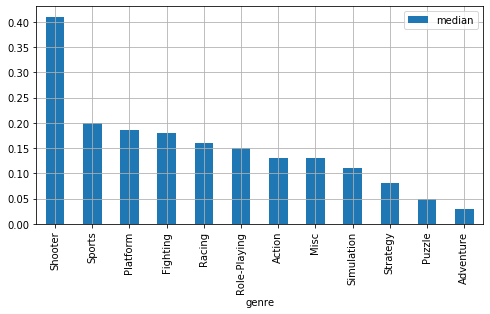

In [47]:
data_2011.groupby('genre')['total_sales'].agg(['median']).sort_values('median',ascending=False).plot(kind='bar', grid=True, figsize=(8, 4))

    Самыми дорогими играми оказались игры жанра Shooter - 0.4 млн доллара, это в два раза
    больше, чем у ближайшего приследователя - игр жанра Sports (0.2 млн доллара).
    
    У лидера продаж игр жанра Action стоимость 1 игры - 0,13 млн доллара

### Шаг 4. Портрет пользователя каждого региона<a class="anchor" id="4-bullet"></a>

### 4.1. Самые популярные жанры (топ-5) каждого региона<a class="anchor" id="4-1-bullet"></a>

Text(0.5, 1.0, 'Japan Sales')

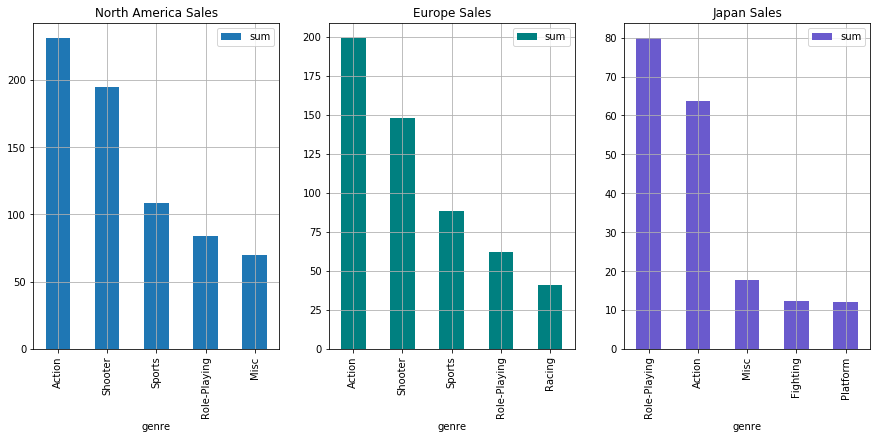

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
data_2011.groupby('genre')['na_sales'].agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[0], )
data_2011.groupby('genre')['eu_sales'].agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[1], color='teal')
data_2011.groupby('genre')['jp_sales'].agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[2], color='slateblue')
axes[0].set_title('North America Sales')
axes[1].set_title('Europe Sales')
axes[2].set_title('Japan Sales')

  
    Четыре самых популярных жанров в С.Америке полностью совпали с популярнами жанрами в Европе.
    В порядке уменьшения: Action, Shooter, Sports, Role-Playing.
    Отличие только в 5 месте: в С.Америке это - Misc (смешанный жанр), в Европе  - это Racing.

    Совсем по другому выглядят предпочтения в Японии.
    На первом месте - Role-Playing, на втором - Action, остальные три жанра сильно отстают от
    лидеров.

### 4.2. Самые популярные платформы (топ-5) каждого региона<a class="anchor" id="4-2-bullet"></a>

Text(0.5, 1.0, 'Japan Sales')

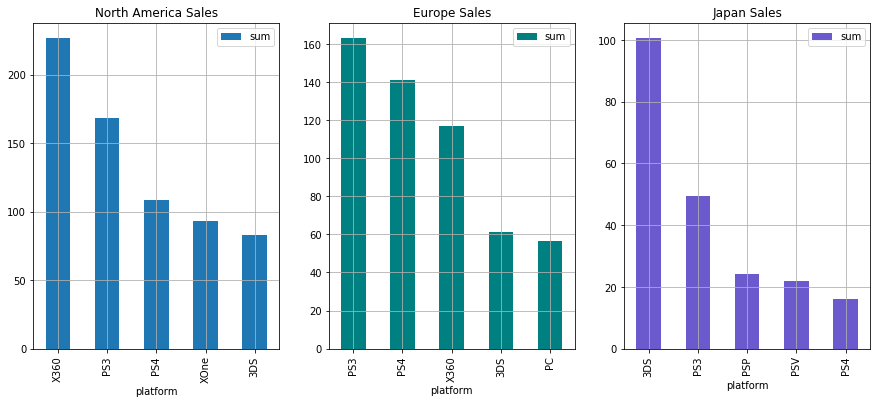

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
data_2011.groupby('platform')['na_sales'].agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[0], )
data_2011.groupby('platform')['eu_sales'].agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[1], color='teal')
data_2011.groupby('platform')['jp_sales'].agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[2], color='slateblue')
axes[0].set_title('North America Sales')
axes[1].set_title('Europe Sales')
axes[2].set_title('Japan Sales')

    В С.Америке на первом месте платформа - Х360 (выпуск с 2005 года, в продаже 12 лет)
    В Европе на первом месте платформа - PS3 (выпуск с 2006 года, в продаже 11 лет)
    В Японии один явный лидер - платформа 3DS, которая в С.Америке и Европе занимает 4 и 5
    место соответственно.(выпуск с 2011 года, в продаже 7лет)

### 4.3. Влияние рейтинга ESRB на продажи<a class="anchor" id="4-3-bullet"></a>

       
**Расшифровка рейтинга ESRB**
    
- «E» (Everyone) — Для всех
- «E10+» («Everyone 10 and older») — Для всех старше 10 лет
- «T» (Teen) — Подросткам 13—19 лет
- «M» (Mature) — От 17 лет
- «K-A» (Kids to Adults)— Для детей и взрослых, т.е. это аналог «E» 
- «AO» (Adults Only 18+) — Только для взрослых
- «EC» (early childhood) – игра предназначена специально для детей младшего возраста (от 3 лет),
- «RP» (Rating Pending)- Рейтинг ожидается

объединим категории «E» и «K-A»

In [50]:
data_2011['rating'].replace('K-A', 'E').value_counts()

no rating    1708
M             622
E             618
T             616
E10+          456
EC              1
RP              1
Name: rating, dtype: int64

Text(0.5, 1.0, 'Japan Sales')

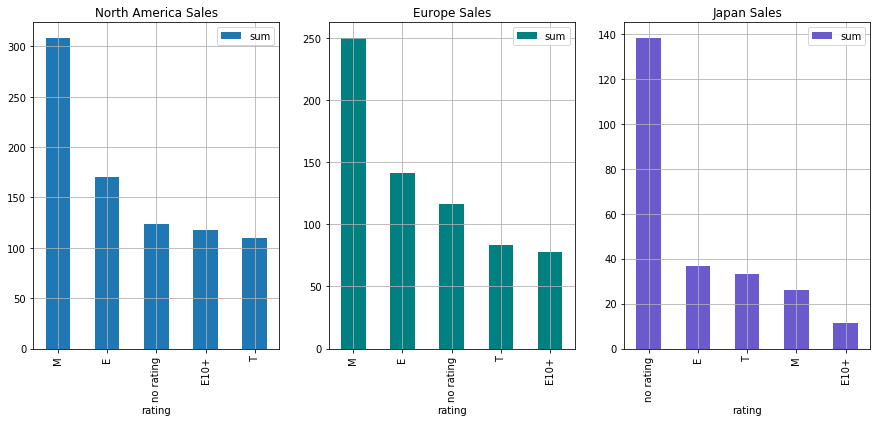

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
data_2011.groupby('rating')['na_sales'].agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[0], )
data_2011.groupby('rating')['eu_sales'].agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[1], color='teal')
data_2011.groupby('rating')['jp_sales'].agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[2], color='slateblue')
axes[0].set_title('North America Sales')
axes[1].set_title('Europe Sales')
axes[2].set_title('Japan Sales')

    Графики с рейтингами С.Америки и Европы очень похожи. Совпали первые три позиции.
    В обоих регионам отдают предпочтения играм с категорией «M» (Mature) — От 17 лет.
    На втором месте игры с категорией «E», т.е. для всех.
    На третье место попали игры, у которых рейтинг не определен.
    На четвертом и пятом месте игры  "Для всех старше 10 лет" и для "Подростков 13—19 лет".
    И в том и другом графике разница между двумя этими категориями не значительная.

    В Японии самые популярные игры, у которых рейтинг не определен.
    Это могло произойти из-за того, что ESRB — негосударственная организация, основное
    направление деятельности которой — принятие и определение рейтингов для компьютерных
    видеоигр и другого развлекательного программного обеспечения в США и Канаде.
    Это организация может быть не знакома с продуктами из Японии. 

### Шаг 5. Проверка гипотез<a class="anchor" id="5-bullet"></a>

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<a class="anchor" id="5-1-bullet"></a>

*H0 (нулевая гипотеза)* - cредние пользовательские рейтинги платформ ***Xbox One*** и ***PC*** одинаковые.

*H1 (альтернативная гипотеза)* - cредний пользовательский рейтинг платформы ***Xbox One*** отличается от cреднего пользовательского рейтинга платформы ***PC***.

пороговое значение alpha = 0.05

In [52]:
from scipy import stats as st

In [53]:
data_XOne = data_2011[(data_2011['platform'] == 'XOne')]
data_PC = data_2011[(data_2011['platform'] == 'PC')]

In [54]:
alpha = 0.05
results = st.ttest_ind(data_XOne['total_sales'], data_PC['total_sales'], equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print ('отвергаем гипотезу')
else:
    print ('не получилось отвергнуть гипотезу')

p-значение: 3.102478340371612e-10
отвергаем гипотезу


    Гипотеза не подтвердилась, у нас есть основания ее отвергнуть.
    Таким образом, cредний пользовательский рейтинг платформы Xbox One отличается от cреднего
    пользовательского рейтинга платформы PC.


### 5.2. Средние пользовательские рейтинги жанров Action  и Sports  разные <a class="anchor" id="5-2-bullet"></a>


*H0 (нулевая гипотеза)* - cредние пользовательские рейтинги жанров ***Action*** и ***Sports*** одинаковые.

*H1 (альтернативная гипотеза)* - cредний пользовательский рейтинг жанра ***Action*** отличается от cреднего пользовательского рейтинга жанров ***Sports***

In [55]:
data_аction = data_2011[(data_2011['genre'] == 'Action')]
data_sports = data_2011[(data_2011['genre'] == 'Sports')]

In [56]:
alpha = 0.05
results = st.ttest_ind(data_аction['user_score'], data_sports['user_score'], equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print ('отвергаем гипотезу')
else:
    print ('не получилось отвергнуть гипотезу')

p-значение: 0.5428125413900603
не получилось отвергнуть гипотезу


    Оснований, чтобы отвергнуть нулевую гипотезу нет.
    Средние пользовательские рейтинги жанров Action и Sports одинаковые.

### Шаг 6. Общий вывод <a class="anchor" id="6-bullet"></a>

        
С 2010 года начинается спад по количеству выпускаемых игр в год и по общим продажам. Это может быть связано с тем, что мобильные игры вытесняют консольные и компьютерные. 51% всей прибыли в игровой индустрии приходиться как раз-таки на игры для мобильных устройств. Согласно аналитическим данным Newzoo, отрыв мобильных игр от консольных, браузерных и компьютерных будет только увеличиваться с каждым годом.     
_____________________________________________________________________________________________

В среднем платформы исчезают через 10-12 лет после выпуска.
Платформы, на которые нужно сделать акцент в следующем году:

- PS4 - год выпуска 2011г., в продаже 7 лет, наибольшая прибыль за последние 3 года (2014-2016) - 288,15 млн доллоров
- XOne - год выпуска 2013., в продаже 5 лет, находится на втором месте по прибыли за последние 3 года (2014-2016) - 140,36 млн доллоров
- 3DS - год выпуска 2011г., в продаже 7 лет, находится на третьем месте по прибыли за последние 3 года (2014-2016) -  86,68 млн доллоров
___________________________________________________________________________________________________

Оценка критиков оказывает больше влияния на продажи, чем оценка пользователей.
___________________________________________________________________________________________________

- Жанры с высокими продажами: Action, Shooter, Role-Playing, Sports.
- Больше всего выпускается игр жанра Action. Число игр с этим жанром сильно превышает остальные.
- самыми дорогими играми оказались игры жанра Shooter - 0.4 млн доллара, это в два раза больше, чем у ближайшего приследователя - игр жанра Sports (0.2 млн доллара). У лидера продаж игр жанра Action стоимость - 0,13 млн доллара
***************************************************************************************************
Если смотреть портрет пользователя по регионам, то предпочтения в С.Америке очень близки к предпочтеним в Европе. Резко от них отличаются данные по предпочтениям в Японии.

Топ-3 жанров в С.Америке и Европе одинаковый:
Action, Shooter, Sports.

В Японии на первом месте - Role-Playing, на втором - Action, остальные три жанра сильно отстают от лидера.

Разными оказались в регионах предпочтения по платформам:
* В С.Америке на первом месте платформа - Х360 (выпуск с 2005 года, в продаже 12 лет)
* В Европе на первом месте платформа - PS3 (выпуск с 2006 года, в продаже 11 лет)
* В Японии один явный лидер - платформа 3DS, которая в С.Америке и Европе занимает 4 и 5 место соответственно.(выпуск с 2011 года, в продаже 7лет)

Топ-3 категорий игр по рейтингу ESRB в С.Америке и Европе одинаковый: первое место - «M» (от 17 лет), второе место - «E» (для всех), на тертьем месте игры, у которых рейтинг не определн.

В Японии самые популярные игры, у которых рейтинг не определен. Это могло произойти из-за того, что ***ESRB*** — негосударственная организация, определяющая рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Это организация может быть не знакома с продуктами из Японии.